## Importing necessary Libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import cv2
import os
import PIL
import pathlib
import matplotlib.pyplot as plt

## Importing Data from the Zip file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## !unzip "/content/drive/MyDrive/Eye Disease Classification/archive (7).zip" -d "/content/drive/MyDrive/Eye Disease Classification/"

In [ ]:
datadir = '/content/drive/MyDrive/Eye Disease Classification/dataset'

In [ ]:
datadir = pathlib.Path(datadir)
datadir

PosixPath('/content/drive/MyDrive/Eye Disease Classification/dataset')

In [ ]:
len(list(datadir.glob(pattern='*/*.jpg')))

2918

In [ ]:
len(list(datadir.glob(pattern ='*/*.png')))

201

In [ ]:
len(list(datadir.glob(pattern ='*/*.jpeg')))

1098

In [ ]:
image_count = len(list(datadir.glob(pattern='*/*.jpg'))) + len(list(datadir.glob(pattern ='*/*.png'))) + len(list(datadir.glob(pattern ='*/*.jpeg')))
image_count

4217

## Visualizing Images in the each Folder

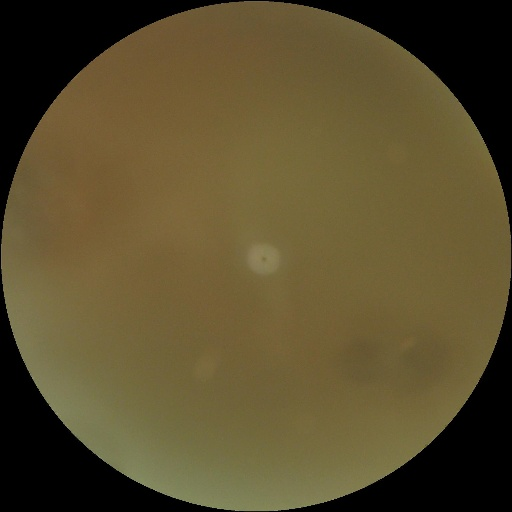

In [ ]:
PIL.Image.open('/content/drive/MyDrive/Eye Disease Classification/dataset/cataract/0_left.jpg')

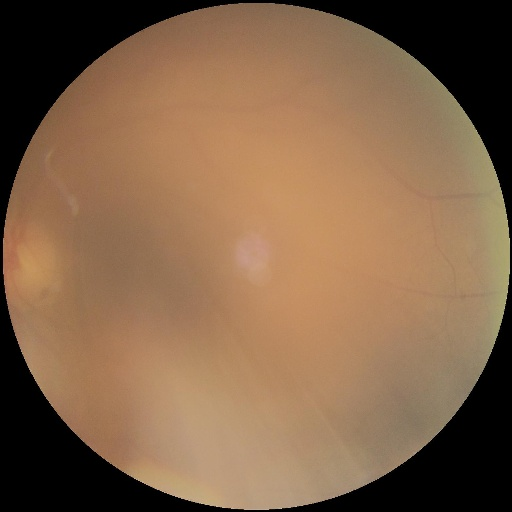

In [ ]:
PIL.Image.open('/content/drive/MyDrive/Eye Disease Classification/dataset/cataract/103_left.jpg')

In [ ]:
eye_image_dict = {
    'cataract': list(datadir.glob(pattern='cataract/*')),
    'glaucoma': list(datadir.glob(pattern='glaucoma/*')),
    'normal': list(datadir.glob(pattern='normal/*')),
    'diabetic_retinopathy': list(datadir.glob(pattern='diabetic_retinopathy/*'))
}

In [ ]:
eye_label_dict = {
    'cataract': 0,
    'glaucoma': 1,
    'normal': 2,
    'diabetic_retinopathy'  : 3
}

In [ ]:
eye_image_dict['cataract'][:5]

[PosixPath('/content/drive/MyDrive/Eye Disease Classification/dataset/cataract/2182_right.jpg'),
 PosixPath('/content/drive/MyDrive/Eye Disease Classification/dataset/cataract/955_right.jpg'),
 PosixPath('/content/drive/MyDrive/Eye Disease Classification/dataset/cataract/2107_left.jpg'),
 PosixPath('/content/drive/MyDrive/Eye Disease Classification/dataset/cataract/2185_left.jpg'),
 PosixPath('/content/drive/MyDrive/Eye Disease Classification/dataset/cataract/_0_4015166.jpg')]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
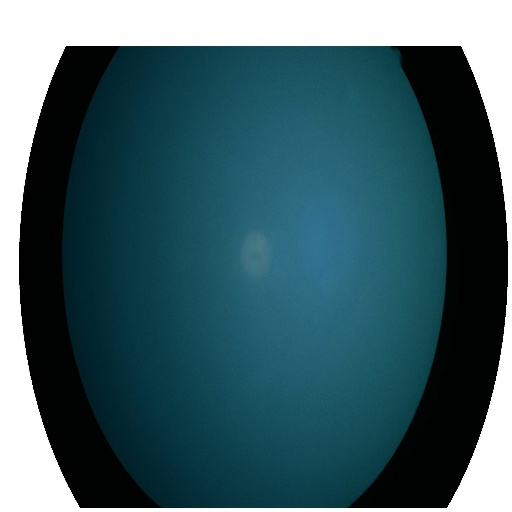

In [ ]:
img = cv2.imread(str(eye_image_dict['cataract'][0]))
img

In [ ]:
img.shape

(512, 512, 3)

In [ ]:
img[np.newaxis, ...].shape

(1, 512, 512, 3)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
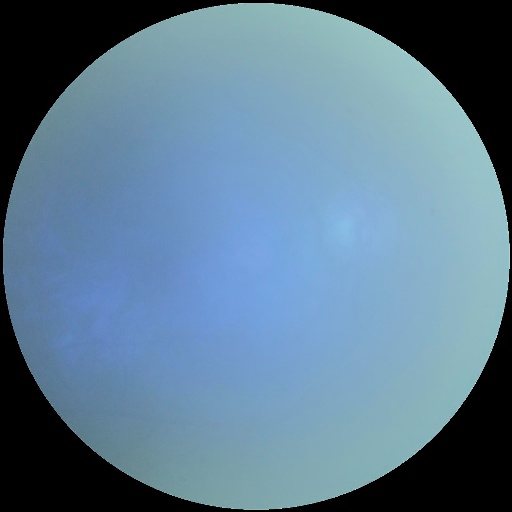

In [ ]:
img = cv2.imread(str(eye_image_dict['cataract'][1]))
img

In [1]:
x, y = [], []
for eye_name, images in eye_image_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, (256, 256))
    x.append(resized_img)
    y.append(eye_label_dict[eye_name])

NameError: name 'eye_image_dict' is not defined

In [ ]:
x = np.array(x)
y = np.array(y)
x.shape, y.shape

((4217, 256, 256, 3), (4217,))

In [ ]:
np.save('/content/drive/MyDrive/Eye Disease Classification/Eye_images_x.npy',x)
np.save('/content/drive/MyDrive/Eye Disease Classification/Eye_images_y.npy',y)

In [ ]:
x = x/255
x[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [ ]:
x = np.load('/content/drive/MyDrive/Eye Disease Classification/Eye_images_x.npy')
y = np.load('/content/drive/MyDrive/Eye Disease Classification/Eye_images_y.npy')

In [ ]:
x.shape

(4217, 256, 256, 3)

In [ ]:
y.shape

(4217,)

In [ ]:
x = x.astype('float16')
y = y.astype('float16')

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify=y, random_state=10)

In [ ]:
x_train.shape, y_train.shape

((2951, 256, 256, 3), (2951,))

In [ ]:
x_test.shape, y_test.shape

((1266, 256, 256, 3), (1266,))

In [ ]:
x.dtype

dtype('float16')

In [ ]:
model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(4,activation = 'softmax')
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=30)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


93/93 [==============================] - 30s 301ms/step - loss: 1.7010 - accuracy: 0.5713
Epoch 2/30
93/93 [==============================] - 27s 292ms/step - loss: 0.5435 - accuracy: 0.7692
Epoch 3/30
93/93 [==============================] - 27s 288ms/step - loss: 0.4312 - accuracy: 0.8343
Epoch 4/30
93/93 [==============================] - 27s 293ms/step - loss: 0.4073 - accuracy: 0.8363
Epoch 5/30
93/93 [==============================] - 27s 290ms/step - loss: 0.3774 - accuracy: 0.8499
Epoch 6/30
93/93 [==============================] - 27s 290ms/step - loss: 0.3549 - accuracy: 0.8597
Epoch 7/30
93/93 [==============================] - 27s 292ms/step - loss: 0.3623 - accuracy: 0.8594
Epoch 8/30
93/93 [==============================] - 27s 294ms/step - loss: 0.3178 - accuracy: 0.8722
Epoch 9/30
93/93 [==============================] - 27s 293ms/step - loss: 0.2763 - accuracy: 0.8950
Epoch 10/30
93/93 [==============================] - 27s 294ms/step - loss: 0.2769 - accuracy: 0.8912


In [ ]:
model.evaluate(x_test, y_test)

40/40 [==============================] - 3s 67ms/step - loss: 0.7672 - accuracy: 0.8736


[0.7672218084335327, 0.8736177086830139]

In [ ]:
ypred = [np.argmax(i) for i in model.predict(x_test)]

40/40 [==============================] - 3s 64ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
cm = confusion_matrix(y_test, ypred)

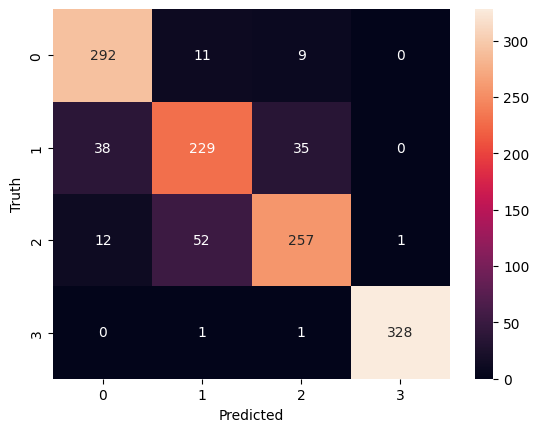

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89       312
         1.0       0.78      0.76      0.77       302
         2.0       0.85      0.80      0.82       322
         3.0       1.00      0.99      1.00       330

    accuracy                           0.87      1266
   macro avg       0.87      0.87      0.87      1266
weighted avg       0.87      0.87      0.87      1266



In [ ]:
eye_label_dict

{'cataract': 0, 'glaucoma': 1, 'normal': 2, 'diabetic_retinopathy': 3}


### **It is clearly understandable that our model is overfitting**

We do data model Modification for overcoming overfitting

In [ ]:
model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(4,activation = 'softmax')
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
checkpoint_cb = ModelCheckpoint("Eye_disease_model_2.keras", save_best_only=True)
early_stopping_cb = EarlyStopping(patience=10,restore_best_weights=True)
model.fit(x_train, y_train, epochs=30,validation_data=(x_test, y_test),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


93/93 [==============================] - 33s 345ms/step - loss: 3.6365 - accuracy: 0.4626 - val_loss: 0.8036 - val_accuracy: 0.6509
Epoch 2/30
93/93 [==============================] - 29s 316ms/step - loss: 0.6908 - accuracy: 0.6933 - val_loss: 0.5771 - val_accuracy: 0.7796
Epoch 3/30
93/93 [==============================] - 30s 322ms/step - loss: 0.5731 - accuracy: 0.7543 - val_loss: 0.5352 - val_accuracy: 0.7725
Epoch 4/30
93/93 [==============================] - 31s 329ms/step - loss: 0.5162 - accuracy: 0.7855 - val_loss: 0.4748 - val_accuracy: 0.8167
Epoch 5/30
93/93 [==============================] - 30s 321ms/step - loss: 0.4373 - accuracy: 0.8184 - val_loss: 0.4328 - val_accuracy: 0.8286
Epoch 6/30
93/93 [==============================] - 30s 320ms/step - loss: 0.4472 - accuracy: 0.8221 - val_loss: 0.4746 - val_accuracy: 0.8073
Epoch 7/30
93/93 [==============================] - 30s 318ms/step - loss: 0.4123 - accuracy: 0.8336 - val_loss: 0.4478 - val_accuracy: 0.8325
Epoch 8/30

In [ ]:
model.evaluate(x_test, y_test)

40/40 [==============================] - 2s 58ms/step - loss: 0.4070 - accuracy: 0.8436


[0.40704187750816345, 0.8436018824577332]

In [ ]:
model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(512, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(1024, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(4,activation = 'softmax')
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


93/93 [==============================] - 45s 470ms/step - loss: 1.7519 - accuracy: 0.4609 - val_loss: 0.9614 - val_accuracy: 0.5561
Epoch 2/30
93/93 [==============================] - 41s 444ms/step - loss: 0.7309 - accuracy: 0.6540 - val_loss: 0.5445 - val_accuracy: 0.7915
Epoch 3/30
93/93 [==============================] - 41s 444ms/step - loss: 0.5238 - accuracy: 0.7760 - val_loss: 0.4603 - val_accuracy: 0.8144
Epoch 4/30
93/93 [==============================] - 41s 438ms/step - loss: 0.4579 - accuracy: 0.8092 - val_loss: 0.4938 - val_accuracy: 0.8136
Epoch 5/30
93/93 [==============================] - 40s 432ms/step - loss: 0.4552 - accuracy: 0.8201 - val_loss: 0.4281 - val_accuracy: 0.8397
Epoch 6/30
93/93 [==============================] - 40s 435ms/step - loss: 0.4089 - accuracy: 0.8346 - val_loss: 0.4643 - val_accuracy: 0.8318
Epoch 7/30
93/93 [==============================] - 40s 436ms/step - loss: 0.3999 - accuracy: 0.8401 - val_loss: 0.3851 - val_accuracy: 0.8562
Epoch 8/30

In [ ]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/10
93/93 [==============================] - 43s 462ms/step - loss: 0.2586 - accuracy: 0.8980 - val_loss: 0.4825 - val_accuracy: 0.8254
Epoch 2/10
93/93 [==============================] - 40s 433ms/step - loss: 0.2740 - accuracy: 0.8933 - val_loss: 0.3993 - val_accuracy: 0.8357
Epoch 3/10
93/93 [==============================] - 40s 435ms/step - loss: 0.2767 - accuracy: 0.8922 - val_loss: 0.3640 - val_accuracy: 0.8736
Epoch 4/10
93/93 [==============================] - 41s 442ms/step - loss: 0.2360 - accuracy: 0.9055 - val_loss: 0.3496 - val_accuracy: 0.8712
Epoch 5/10
93/93 [==============================] - 41s 437ms/step - loss: 0.2232 - accuracy: 0.9139 - val_loss: 0.4137 - val_accuracy: 0.8404
Epoch 6/10
93/93 [==============================] - 40s 432ms/step - loss: 0.2142 - accuracy: 0.9254 - val_loss: 0.4791 - val_accuracy: 0.8412
Epoch 7/10
93/93 [==============================] - 41s 443ms/step - loss: 0.2004 - accuracy: 0.9221 - val_loss: 0.3625 - val_accuracy: 0.8586

In [ ]:
model.evaluate(x_test,y_test)

40/40 [==============================] - 3s 73ms/step - loss: 0.6305 - accuracy: 0.8594


[0.6304910182952881, 0.859399676322937]